In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(1,'/Users/user/Documents/MeerFish')
import cosmo
import model
import fisher
import survey

## Testing multi-tracer isn't over enhancing f_NL results: 

Do this by splitting survey in two and running multi-tracer on two splits. Should deliver same results as single-tracer on the whole survey

Then try making the biases in the two halved surveys different. This should deliver some improved f_NL constraint

In [2]:
### Survey parameters:
z,zmin1,zmin2,zmax1,zmax2,A_sky1,A_sky2,V_bin1,V_bin2,V_binX,theta_FWHM1,theta_FWHM2,t_tot,N_dish,sigma_z1,sigma_z2,P_N,nbar = survey.params()
surveypars = z,V_bin1,V_bin2,V_binX,theta_FWHM1,theta_FWHM2,sigma_z1,sigma_z2,P_N,1/nbar

### Cosmological parameters:
Tbar1,Tbar2,b1,b2,bphi1,bphi2,f,a_perp,a_para,A_BAO,f_NL = cosmo.SetCosmology(z=z,return_cosmopars=True) # set initial default cosmology
cosmopars = np.array([Tbar1,Tbar2,b1,b2,bphi1,bphi2,f,a_perp,a_para,A_BAO,f_NL])
Pmod = cosmo.MatterPk(z)

### k-bins:
kmin = 0.02
kmax = 0.3
kbins = np.linspace(kmin,kmax,200)
k = (kbins[1:] + kbins[:-1])/2 #centre of k bins

$f_{\rm NL}$$=0.00\pm29.7$
$f_{\rm NL}$$=0.00\pm29.7$
$f_{\rm NL}$$=0.00\pm6.20$


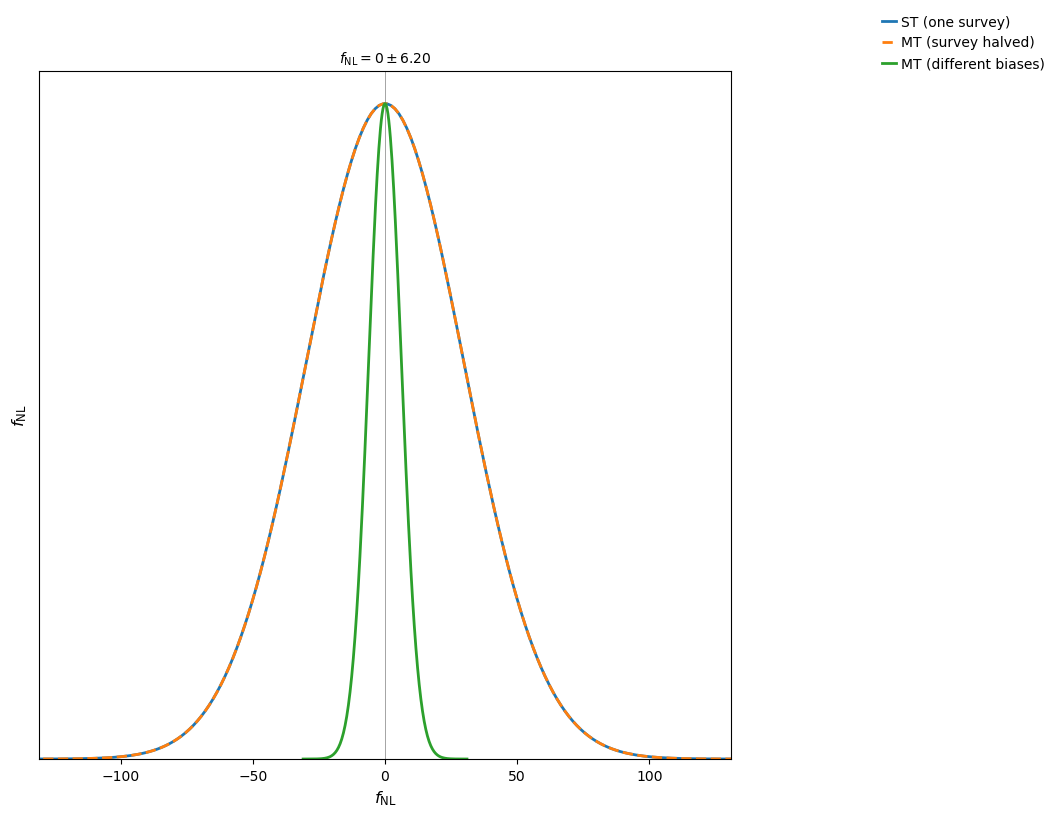

In [3]:
### Parameter selection:
import model
theta_ids = [\
#r'$\overline{T}_{\rm HI}$',\
#r'$b_1$',\
#r'$b_2$',\
#r'$b^\phi_1$',\
#r'$b^\phi_2$',\
#r'$f$',\
#r'$\alpha_\perp$',\
#r'$\alpha_\parallel$',\
#r'$A_{\rm BAO}$',\
r'$f_{\rm NL}$'\
]

Fs = []
ells = [0,2]

### Single tracer for 1 survey:
P_N1 = model.P_N(z,A_sky1,t_tot,N_dish,theta_FWHM=theta_FWHM1)
surveypars = z,V_bin1,V_bin1,V_bin1,theta_FWHM1,theta_FWHM1,sigma_z1,sigma_z1,P_N1,P_N1
cosmopars = np.array([Tbar1,Tbar1,b1,b1,bphi1,bphi1,f,a_perp,a_para,A_BAO,f_NL])
theta = model.get_param_vals(theta_ids,z,cosmopars)
Fs.append( fisher.Matrix_ell(theta_ids,k,Pmod,cosmopars,surveypars,ells,tracer='1') )

### Split survey in half and take it's multi-tracer (shouldn't improve on single-tracer):
t_tot_split = t_tot/2
P_N1 = model.P_N(z,A_sky1,t_tot_split,N_dish,theta_FWHM=theta_FWHM1)
surveypars = z,V_bin1,V_bin1,V_bin1,theta_FWHM1,theta_FWHM1,sigma_z1,sigma_z1,P_N1,P_N1
Fs.append( fisher.Matrix_ell(theta_ids,k,Pmod,cosmopars,surveypars,ells,tracer='MT') )

### Multi-tracer of same two surveys now with different bias:
b2 = b1 + 2
bphi2 = cosmo.b_phi_universality(b2)
cosmopars = np.array([Tbar1,Tbar1,b1,b2,bphi1,bphi2,f,a_perp,a_para,A_BAO,f_NL])
theta = model.get_param_vals(theta_ids,z,cosmopars)
Fs.append( fisher.Matrix_ell(theta_ids,k,Pmod,cosmopars,surveypars,ells,tracer='MT') )

Flabels = ['ST (one survey)','MT (survey halved)','MT (different biases)']
ls = ['-','--','-']

fontsize = 10
fisher.CornerPlot(Fs,theta,theta_ids,Flabels=Flabels,ls=ls,fontsize=fontsize)
plt.show()